In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import missingno as msno

In [18]:
df = pd.read_excel('E:\special\Bertelsmann Schoolarship-Udacity\data-track-schoolarship\Creditworthiness\credit-data-training.xlsx')
df

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,None,1.0,1,NaN,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,None,NaN,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,None,NaN,4,63.0,Other Banks/Depts,3,1,1,1,2,1


<function matplotlib.pyplot.show(*args, **kw)>

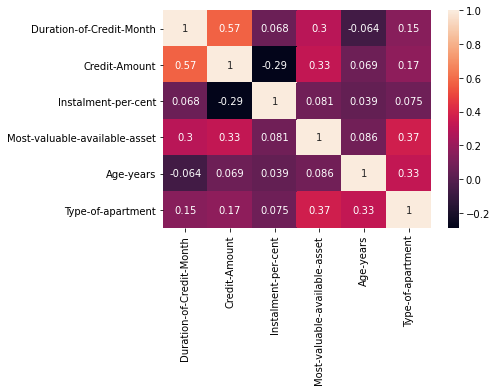

In [41]:
sn.heatmap(df.corr(), annot=True)
plt.show

In [3]:
df = df.astype({"Credit-Amount": float,"Instalment-per-cent": float,"Instalment-per-cent": float,"Duration-in-Current-address": float
               ,"Most-valuable-available-asset": float,"Age-years": float,"Type-of-apartment": float,"Occupation": float
               ,"No-of-dependents": float,"Telephone": float,"Foreign-Worker": float})

In [37]:
del df['Foreign-Worker']

In [39]:
age_median = df['Age-years'].median()
df['Age-years'].fillna(age_median, inplace=True)

In [45]:
df

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,1,33.0,2,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,1,27.0,2,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,4,27.0,3,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,4,63.0,3,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


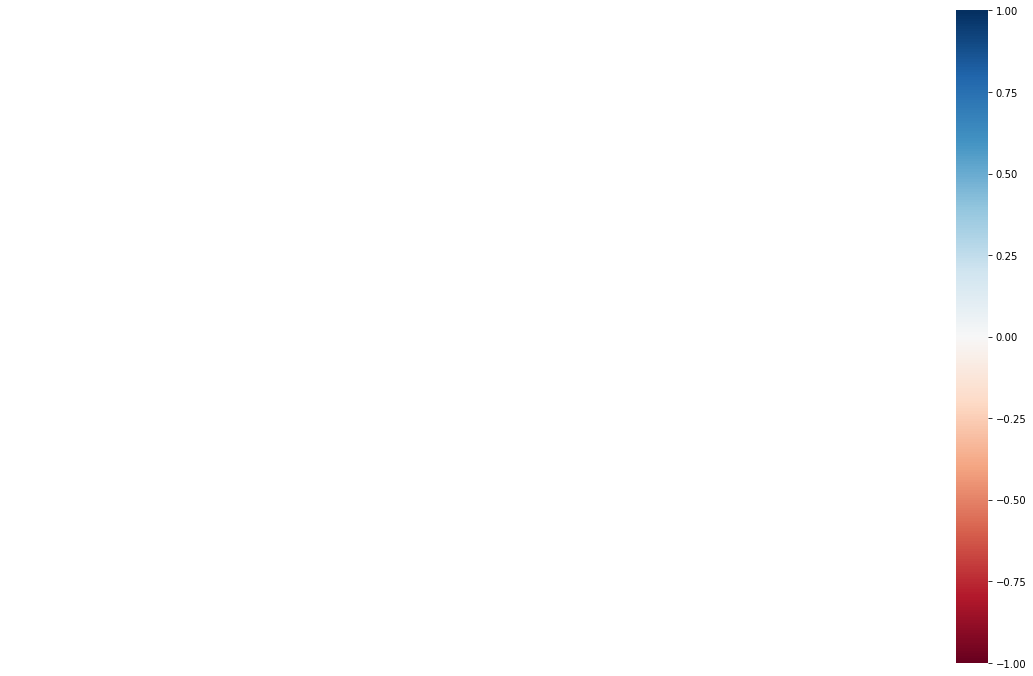

In [46]:
msno.heatmap(df)

In [54]:
X = df[['Duration-of-Credit-Month','Credit-Amount',
       'Instalment-per-cent','Most-valuable-available-asset','Type-of-apartment']]
y =  df[['Credit-Application-Result']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

X_test
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Non-Creditworthy', 'Non-Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Non-Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Non-Creditworthy',
      